# Sejin - Group 5 Project

### Business Understanding

aaa

### Data Understanding

bbb

### Loading the Data

ccc

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats  
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from itertools import combinations

In [2]:
data = pd.read_csv("data/kc_house_data.csv", index_col=0)

In [3]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [5]:
data.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
data.waterfront.fillna(value=0, inplace = True)
data.yr_renovated.fillna(value=0, inplace = True)
data.view.fillna(value=0, inplace = True)

In [7]:
data.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
data = data.drop(data[data['bedrooms']==33].index).copy()

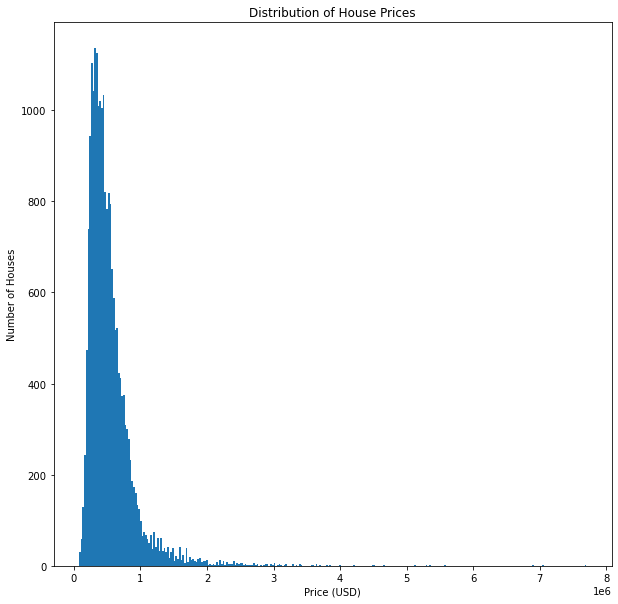

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.hist(data['price'], bins=300)

ax.set_xlabel("Price (USD)")
ax.set_ylabel("Number of Houses")
ax.set_title("Distribution of House Prices");

In [10]:
X = data.drop("price", axis=1)
y = data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,
9834201100,12/22/2014,4,2.00,1440,4855,2.0,0.0,0.0,4,7,1440,0.0,1972,0.0,98144,47.5717,-122.287,1300,4080
7795810110,5/12/2015,3,1.75,1430,9857,1.0,0.0,2.0,4,7,1140,290.0,1980,0.0,98045,47.4964,-121.771,1310,9880
1853081250,12/29/2014,4,2.75,3120,5000,2.0,0.0,0.0,3,9,3120,0.0,2010,0.0,98074,47.5940,-122.062,3200,5000
2558630350,3/21/2015,4,2.50,2060,6958,1.0,0.0,0.0,3,7,1220,840.0,1974,0.0,98034,47.7251,-122.168,1760,7350
3362401000,7/1/2014,3,2.00,2500,4080,1.5,0.0,0.0,5,7,1680,820.0,1922,0.0,98103,47.6813,-122.346,1550,3060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7853230570,9/15/2014,3,2.50,2230,5800,2.0,0.0,0.0,3,7,2230,0.0,2004,0.0,98065,47.5308,-121.847,2230,6088
1931300412,4/16/2015,3,2.25,1190,1200,3.0,0.0,0.0,3,8,1190,0.0,2008,0.0,98103,47.6542,-122.346,1180,1224
8658300480,7/21/2014,4,1.50,1530,9000,1.0,0.0,0.0,4,6,1530,0.0,1976,0.0,98014,47.6492,-121.908,1520,8500


#### 1. Interpret a Correlation Heatmap to Build a Baseline Model

Start modeling by choosing the feature that is most correlated with our target, and build and evaluate a linear regression model with just that feature.

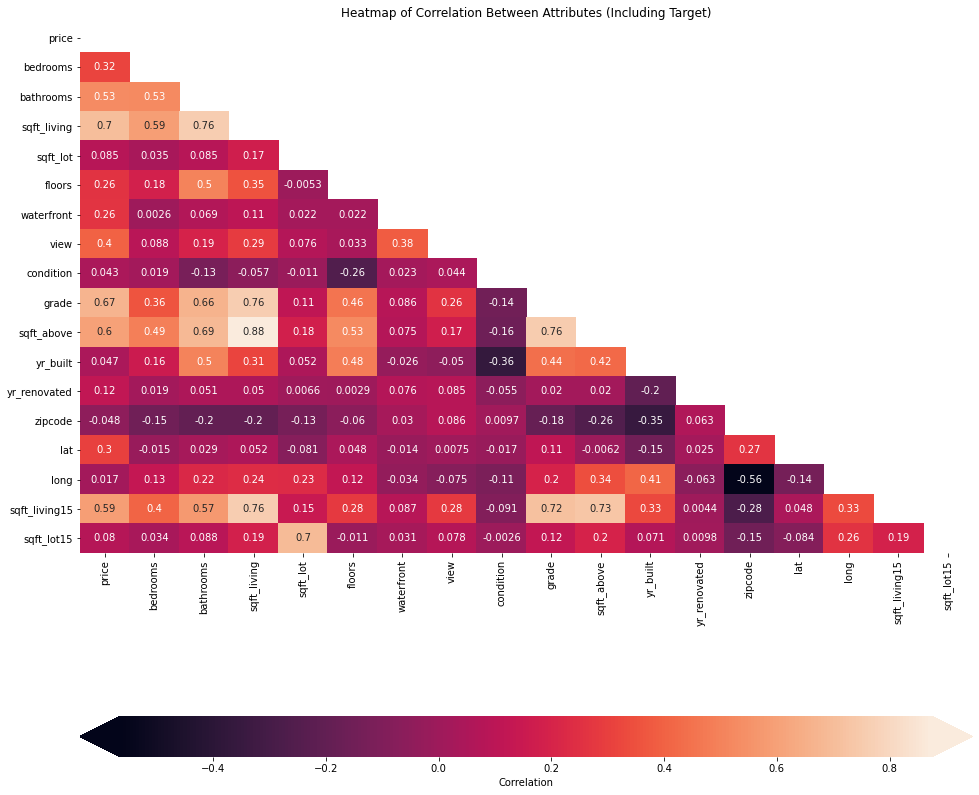

In [11]:
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(16, 15))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

Based on the plot above, 'sqft_living' is most strongly correlated with the target (`price`).

In [12]:
most_correlated_feature = 'sqft_living'

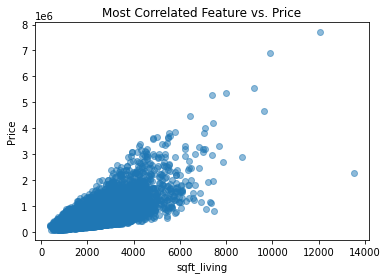

In [13]:
fig, ax = plt.subplots()

ax.scatter(X_train[most_correlated_feature], y_train, alpha=0.5)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel("Price")
ax.set_title("Most Correlated Feature vs. Price");

##Process additional transformation on our baseline model.

### Building a Baseline Model

Now, we'll build a linear regression model using just that feature, which will serve as our baseline model:

In [14]:
baseline_model = LinearRegression()

###Then we evaluate the model using `cross_validate` and `ShuffleSplit`, which essentially means that we perform 3 separate train-test splits within our `X_train` and `y_train`, then we find both the train and the test scores for each.

In [15]:
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())


Train score:      0.487875389086073
Validation score: 0.501687665023275


##Interpret these scores. below. What are we measuring? What can we learn from this?

## 2. Build a Model with All Relevant Numeric Features
We will add in the rest of the relevant numeric features of the training data, and compare that model's performance to the performance of the baseline model.

In [16]:
X_train_numeric = X_train.select_dtypes('number').copy()
X_train_numeric

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,
9834201100,4,2.00,1440,4855,2.0,0.0,0.0,4,7,1440,1972,0.0,98144,47.5717,-122.287,1300,4080
7795810110,3,1.75,1430,9857,1.0,0.0,2.0,4,7,1140,1980,0.0,98045,47.4964,-121.771,1310,9880
1853081250,4,2.75,3120,5000,2.0,0.0,0.0,3,9,3120,2010,0.0,98074,47.5940,-122.062,3200,5000
2558630350,4,2.50,2060,6958,1.0,0.0,0.0,3,7,1220,1974,0.0,98034,47.7251,-122.168,1760,7350
3362401000,3,2.00,2500,4080,1.5,0.0,0.0,5,7,1680,1922,0.0,98103,47.6813,-122.346,1550,3060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7853230570,3,2.50,2230,5800,2.0,0.0,0.0,3,7,2230,2004,0.0,98065,47.5308,-121.847,2230,6088
1931300412,3,2.25,1190,1200,3.0,0.0,0.0,3,8,1190,2008,0.0,98103,47.6542,-122.346,1180,1224
8658300480,4,1.50,1530,9000,1.0,0.0,0.0,4,6,1530,1976,0.0,98014,47.6492,-121.908,1520,8500


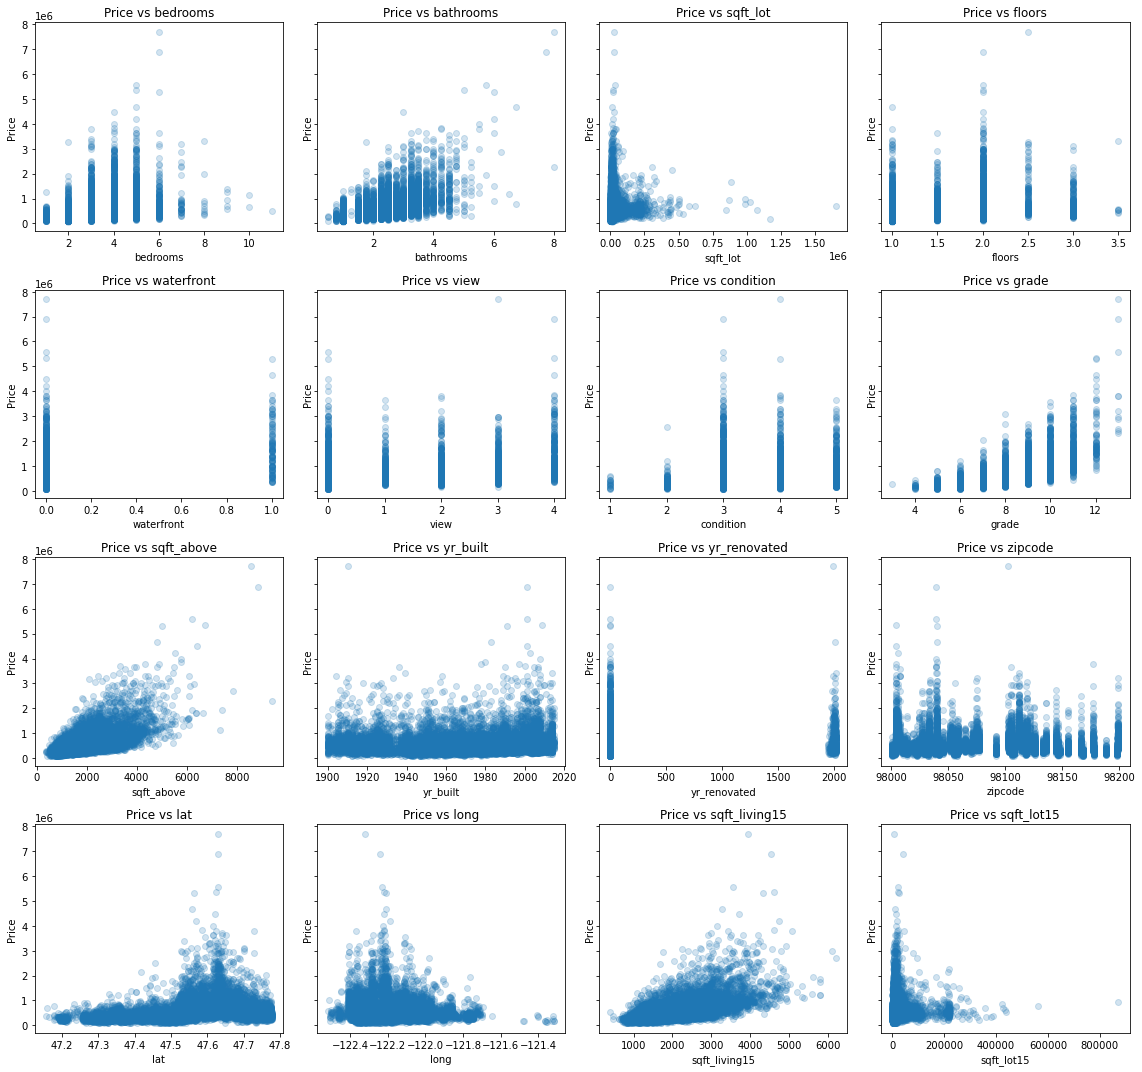

In [17]:
scatterplot_data = X_train_numeric.drop("sqft_living", axis=1)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16,15), sharey=True)
fig.set_tight_layout(True)

for ax, column in zip(axes.flatten(), scatterplot_data.columns):
    ax.scatter(scatterplot_data[column], y_train, alpha=0.2)
    ax.set_xlabel(column)
    ax.set_ylabel("Price")
    ax.set_title(f'Price vs {column}')

Drop irrelvant columns.

In [18]:
irrelevant_columns = [
'view',
'sqft_above',
'yr_renovated',
'zipcode',
'lat',
'long',
'sqft_living15',
'sqft_lot15']

Create a variable `X_data_second_model`, which is a copy of `X_data_numeric` where those irrelevant columns have been removed.

In [19]:
X_train_second_model = X_train_numeric.drop(irrelevant_columns, axis=1).copy()
X_train_second_model

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
id,,,,,,,,,
9834201100,4,2.00,1440,4855,2.0,0.0,4,7,1972
7795810110,3,1.75,1430,9857,1.0,0.0,4,7,1980
1853081250,4,2.75,3120,5000,2.0,0.0,3,9,2010
2558630350,4,2.50,2060,6958,1.0,0.0,3,7,1974
3362401000,3,2.00,2500,4080,1.5,0.0,5,7,1922
...,...,...,...,...,...,...,...,...,...
7853230570,3,2.50,2230,5800,2.0,0.0,3,7,2004
1931300412,3,2.25,1190,1200,3.0,0.0,3,8,2008
8658300480,4,1.50,1530,9000,1.0,0.0,4,6,1976


### Building and Evaluating the Second Model

In [20]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=X_train_second_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.6448675781501251
Validation score: 0.6533888921541882

Baseline Model
Train score:      0.487875389086073
Validation score: 0.501687665023275


Current model's validation score is higher than the baseline model.

## 3. Select the Best Combination of Features



### Investigating Multicollinearity

In [21]:
sm.OLS(y_train, sm.add_constant(X_train_second_model)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     3531.
Date:                Mon, 12 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:38:42   Log-Likelihood:            -2.3694e+05
No. Observations:               17276   AIC:                         4.739e+05
Df Residuals:                   17266   BIC:                         4.740e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.761e+06   1.44e+05     46.789      0.000    6.48e+06    7.04e+06
bedrooms    -4.638e+04   2380.451    -19.483      0.000    -5.1e+04   -4.17e+04
bathrooms    5.331e+04   3883.668     13.727      0.000    4.57e+04    6.09e+04
sqft_living   178.3391      3.731     47.800      0.000     171.026     185.652
sqft_lot       -0.2706      0.041     -6.577      0.000      -0.351      -0.190
floors        1.99e+04   3865.419      5.149      0.000    1.23e+04    2.75e+04
waterfront   7.257e+05   2.04e+04     35.642      0.000    6.86e+05    7.66e+05
condition    2.054e+04   2774.387      7.402      0.000    1.51e+04     2.6e+04
grade        1.313e+05   2417.865     54.322      0.000    1.27e+05    1.36e+05
yr_built    -3883.0491     74.228    -52.313      0.000   -4028.543   -3737.555
==============================================================================
Omnibus:                    12794.790   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           819936.469
Skew:                           2.975   Prob(JB):                         0.00
Kurtosis:                      36.221   Cond. No.                     3.83e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A condition number of 10-30 indicates multicollinearity, and a condition number above 30 indicates strong multicollinearity. This print-out shows a condition number of `3.83e+06`, i.e. 383000, which is well above 30.

### Selecting Features with `sklearn.feature_selection`

"RFE" stands for "recursive feature elimination", meaning that it repeatedly scores the model, finds and removes the feature with the lowest "importance", then scores the model again. If the new score is better than the previous score, it continues removing features until the minimum is reached. "CV" stands for "cross validation" here, and we can use the same splitter we have been using to test our data so far.

In [22]:
# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_train_second_model)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train_second_model.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: True
bathrooms: True
sqft_living: True
sqft_lot: True
floors: True
waterfront: True
condition: True
grade: True
yr_built: True


A Brute Force Approach

In [37]:
features = ["sqft_living", "bedrooms", "bathrooms", "sqft_lot", "floors", "waterfront", "condition", "grade", "yr_built"]

# Make a dataframe to hold the results (not strictly necessary
# but it makes the output easier to read)
results_df = pd.DataFrame(columns=features)

# Selecting just piece_count
results_df = results_df.append({
    "train_score": baseline_scores["train_score"].mean(),
    "val_score": baseline_scores["test_score"].mean()
}, ignore_index=True)

# Selecting 1 additional feature
for feature in features[1:]:
    scores = cross_validate(
        estimator=second_model,
        X=X_train[["sqft_living", feature]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    # Note: this technique of appending to a df is quite inefficient
    # Here it works because it's only happening 6 times, but avoid
    # doing this for a whole dataset
    results_df = results_df.append({
        feature: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True)
    
# Selecting 2 additional features
for (feature1, feature2) in list(combinations(features[1:], 2)):
    scores = cross_validate(
        estimator=second_model,
        X=X_train[["sqft_living", feature1, feature2]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    results_df = results_df.append({
        feature1: "Yes",
        feature2: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True)

# Selecting 3 additional features
for (feature1, feature2, feature3) in list(combinations(features[1:], 3)):
    scores = cross_validate(
        estimator=second_model,
        X=X_train[["sqft_living", feature1, feature2, feature3]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    results_df = results_df.append({
        feature1: "Yes",
        feature2: "Yes",
        feature3: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True)    

# Selecting 4 additional features
for (feature1, feature2, feature3, feature4) in list(combinations(features[1:], 4)):
    scores = cross_validate(
        estimator=second_model,
        X=X_train[["sqft_living", feature1, feature2, feature3, feature4]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    results_df = results_df.append({
        feature1: "Yes",
        feature2: "Yes",
        feature3: "Yes",
        feature4: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True)    
  


# Fill in remaining values where appropriate
results_df["sqft_living"] = "Yes"
results_df.fillna("No", inplace=True)

results_df.sort_values(by='train_score', ascending=False).head(10)

,sqft_living,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,grade,yr_built,train_score,val_score
126,Yes,Yes,No,No,No,Yes,No,Yes,Yes,0.636408,0.647985
146,Yes,No,Yes,No,No,Yes,No,Yes,Yes,0.635177,0.643655
160,Yes,No,No,No,Yes,Yes,No,Yes,Yes,0.632798,0.643231
162,Yes,No,No,No,No,Yes,Yes,Yes,Yes,0.632511,0.642134
156,Yes,No,No,Yes,No,Yes,No,Yes,Yes,0.632490,0.641912
91,Yes,No,No,No,No,Yes,No,Yes,Yes,0.631501,0.641745
107,Yes,Yes,Yes,No,No,No,No,Yes,Yes,0.614724,0.628706
117,Yes,Yes,No,Yes,No,No,No,Yes,Yes,0.609955,0.624860
123,Yes,Yes,No,No,Yes,No,No,Yes,Yes,0.609920,0.626038
127,Yes,Yes,No,No,No,No,Yes,Yes,Yes,0.609825,0.625170


In [38]:
results_df.sort_values(by='val_score', ascending=False).head(10)

,sqft_living,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,grade,yr_built,train_score,val_score
126,Yes,Yes,No,No,No,Yes,No,Yes,Yes,0.636408,0.647985
146,Yes,No,Yes,No,No,Yes,No,Yes,Yes,0.635177,0.643655
160,Yes,No,No,No,Yes,Yes,No,Yes,Yes,0.632798,0.643231
162,Yes,No,No,No,No,Yes,Yes,Yes,Yes,0.632511,0.642134
156,Yes,No,No,Yes,No,Yes,No,Yes,Yes,0.632490,0.641912
91,Yes,No,No,No,No,Yes,No,Yes,Yes,0.631501,0.641745
107,Yes,Yes,Yes,No,No,No,No,Yes,Yes,0.614724,0.628706
123,Yes,Yes,No,No,Yes,No,No,Yes,Yes,0.609920,0.626038
127,Yes,Yes,No,No,No,No,Yes,Yes,Yes,0.609825,0.625170
117,Yes,Yes,No,Yes,No,No,No,Yes,Yes,0.609955,0.624860



#### 4. Build and Evaluate a Final Predictive Model

Using the best features selected in the previous step, create a final model, fit it on all rows of the training dataset, and evaluate it on all rows of the test dataset in terms of both r-squared and RMSE.

In [39]:
best_features = ['sqft_living','bedrooms', 'waterfront', 'grade', 'yr_built']

In [40]:
X_train_final = X_train[best_features]
X_test_final = X_test[best_features]

In [41]:
final_model = LinearRegression()

# Fit the model on X_train_final and y_train
final_model.fit(X_train_final, y_train)

# Score the model on X_test_final and y_test
# (use the built-in .score method)
final_model.score(X_train_final, y_train)

0.6402026676114349

In [42]:
mean_squared_error(y_test, final_model.predict(X_test_final), squared=False)

218871.47327158123

The price in the model is off by $218871.

#### 5. Interpret the Final Model

Determine what, if any, understanding of the underlying relationship between variables can be determined with this model. This means you will need to interpret the model coefficients as well as checking whether the assumptions of linear regression have been met.

In [44]:
print(pd.Series(final_model.coef_, index=X_train_final.columns, name="Coefficients"))
print()
print("Intercept:", final_model.intercept_)

sqft_living       198.265824
bedrooms       -37321.104783
waterfront     734172.269489
grade          137837.495363
yr_built        -3547.323779
Name: Coefficients, dtype: float64

Intercept: 6185401.270327588


### Investigating Linearity

Check whether the linearity assumption holds.

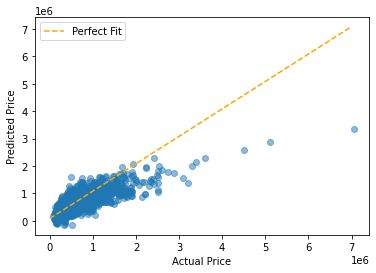

In [43]:
preds = final_model.predict(X_test_final)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

### Investigating Normality

Check whether the normality assumption holds for our model.

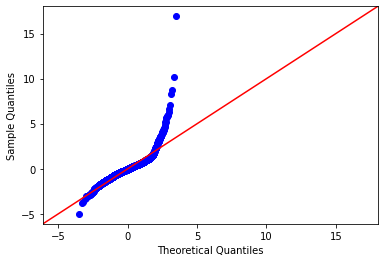

In [46]:
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

### Investigating Multicollinearity (Independence Assumption)

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
pd.Series(vif, index=X_train_final.columns, name="Variance Inflation Factor")

sqft_living     20.319702
bedrooms        23.739955
waterfront       1.024867
grade          114.891056
yr_built        86.570835
Name: Variance Inflation Factor, dtype: float64

### Investigating Homoscedasticity

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

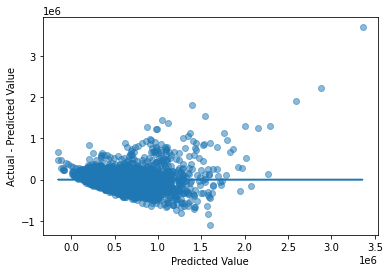

In [49]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

# Conclusion